### Objetivo:

Dimininuir o número de variáveis com intuito de diminuir variáveis irrelevantes no modelo, diminuir o custo o computacional e evitar o overfitting 


### Etapas:

1) Carregando tabelas e importando bibliotecas

2) Feature selection em variaveis categóricas
 - Redução por associação (Qui-Quadrado)
 - Método Baseado em Wrapper (Regressão logística) - RFE (Recursive feature elimination)
 - Embendded (Random Forest)

3) Comparando modelos e realizando processo de voting
- Selecionando features que aparecerem em 2 ou mais métodos

4) Feature selection em variáveis númericas
- Correlação de pearson

5) Selecionando features e criação da nova ABT (analytical base table)

### 1) Carregando tabelas e importando bibliotecas

In [0]:
from sklearn.feature_selection import f_regression,RFECV,SelectKBest,RFE,SelectFromModel,chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [0]:
abt_treino = spark.sql("select * from abt_treino")
abt_teste = spark.sql("select * from abt_teste")

In [0]:
abt_treino = abt_treino.toPandas()
abt_teste = abt_teste.toPandas()

target = abt_treino[['ja_fumou']]
explicativas = abt_treino.drop(columns=['ja_fumou','aluno'],axis=1)

In [0]:
abt_treino.shape

Out[3]: (71450, 401)

## 2) Feature selection em variaveis categóricas

In [0]:
chi_selector = SelectKBest(chi2, k=35)
chi_selector.fit(explicativas,target)
chi_support =  chi_selector.get_support()
chi_feature = explicativas.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), "São as variáveis selecionadas ")
print(chi_feature)

35 São as variáveis selecionadas 
['qtd_dias_Refrigerante_ultima_semana', 'TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEXTRA', 'TEMPOEST', 'ja_bebeu', 'ja_usou_droga', 'ofendeu_Pessoas_ultimo_mes', 'Ja_Teve_Relacao_Sexual', 'envolvimento_briga_alguem_armado_ultimo_mes', 'envolvimento_briga_alguem_armaBranca_ultimo_mes', 'qtd_dias_fumaramAoRedor_ultima_semanaNenhumdianosultimos7dias0dia', 'qtd_dias_fumaramAoRedor_ultima_semanaTodosos7diasnosultimos7dias', 'qtd_dias_tabaco_ultimo_mes3a5diasnosultimos30dias', 'qtd_dias_tabaco_ultimo_mes6a9diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes1ou2diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes10a19diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes3a5diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes6a9diasnosultimos30dias', 'Como_Conseguiu_Bebida_ultimo_mesCompreinomercadolojabarousupermercado', 'Como_Conseguiu_Bebida_ultimo_mesConseguicommeusamigos', 'Como_Conseguiu_Bebida_ultimo_mesEmumafesta', 'qtd_embriaguez_na_vida1ou2vezesnavida', 'qtd_embriaguez_na_vida10oumaisvezesnavida', 'qtd_embriaguez_na_vida3a5vezesnavida', 'qtd_embriaguez_na_vida6a9vezesnavida', 'qtd_brigas_por_bebida1ou2vezesnavida', 'qtd_brigas_por_bebidaNenhumaveznavida0vez', 'qtd_amigos_que_bebemAmaioria', 'qtd_amigos_que_bebemNenhum', 'qtd_amigos_que_bebemTodos', 'qtd_amigos_que_drogasAmaioria', 'qtd_amigos_que_drogasAlguns', 'qtd_amigos_que_drogasNenhum', 'doses_ultimo_mes30dias']

In [0]:
lr = LogisticRegression(random_state=42)

rfe_selector = RFE(lr,
                  n_features_to_select=35,
                  step=50)

rfe_selector.fit(explicativas,target)

rfe_support = rfe_selector.get_support()
rfe_feature = explicativas.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), "São as variáveis selecionadas ")
print(rfe_feature)

/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
35 São as variáveis selecionadas 
['ja_bebeu', 'ja_usou_droga', 'Ja_Teve_Relacao_Sexual', 'Regiao_GeograficaNordeste', 'Regiao_GeograficaSudeste', 'Serie_estuda2_ano_EM', 'Pretensao_Atividade_Fisica_ultima_semananao_faria_atividade', 'qtd_dias_fumaramAoRedor_ultima_semana1ou2diasnosultimos7dias', 'qtd_dias_fumaramAoRedor_ultima_semanaNenhumdianosultimos7dias0dia', 'qtd_dias_tabaco_ultimo_mes1ou2diasnosultimos30dias', 'qtd_dias_tabaco_ultimo_mesNenhumdianosultimos30dias0dia', 'qtd_dias_tabaco_ultimo_mesNaoinformado', 'qtd_dias_tabaco_ultimo_mesTodososdiasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes10a19diasnosultimos30dias', 'Como_Conseguiu_Bebida_ultimo_mesCompreinomercadolojabarousupermercado', 'Como_Conseguiu_Bebida_ultimo_mesConseguicommeusamigos', 'Como_Conseguiu_Bebida_ultimo_mesNaotomeinenhumabebidaalcoolicanosultimos30dias0dia', 'Como_Conseguiu_Bebida_ultimo_mesPegueinaminhacasasempermissao', 'qtd_embriaguez_na_vida1ou2vezesnavida', 'qtd_embriaguez_na_vida10oumaisvezesnavida', 'qtd_embriaguez_na_vida3a5vezesnavida', 'qtd_embriaguez_na_vida6a9vezesnavida', 'qtd_amigos_que_drogasAmaioria', 'qtd_amigos_que_drogasAlguns', 'qtd_amigos_que_drogasPoucos', 'qtd_amigos_que_drogasTodos', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesNamaiorpartedotempo', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesNunca', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesRaramente', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesSempre', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesAsvezes', 'doses_ultimo_mes30dias', 'doses_ultimo_mes10a19dias', 'doses_ultimo_mes20a29dias', 'doses_ultimo_mes6a9dias']

In [0]:
rf = RandomForestClassifier(random_state=42)

emb_selector = SelectFromModel(rf)

emb_selector.fit(explicativas,target)

emb_suppport = emb_selector.get_support()
emb_feature = explicativas.loc[:,emb_suppport].columns.tolist()
print(str(len(emb_feature)), "São as variáveis selecionadas ")
print(emb_feature)

/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 self.estimator_.fit(X, y, **fit_params)
83 São as variáveis selecionadas 
['Idade', 'Mes_Nascimento', 'Ano_Nascimento', 'Mora_Pai', 'Pessoas_Moram_Casa', 'Banheiros_Chuveiro', 'qtd_dias_Feijao_ultima_semana', 'qtd_dias_Frituras_ultima_semana', 'qtd_dias_Legumes_Verduras_ultima_semana', 'qtd_dias_Guloseimas_ultima_semana', 'qtd_dias_Frutas_Saladas_ultima_semana', 'qtd_dias_Refrigerante_ultima_semana', 'qtd_dias_Industrializados_ultima_semana', 'qtd_dias_Fast_Food_ultima_semana', 'qtd_dias_Com_Fome_ultimo_mes', 'qtd_dias_Frutas_ultimo_mes', 'qtd_dias_Legumes_Verduras_ultimo_mes', 'qtd_dias_Refrigerante_ultima_mes', 'qtd_dias_Indo_Caminhando_Escola_ultima_semana', 'qtd_dias_Voltando_Caminhando_Escola_ultima_semana', 'qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana', 'qtd_dias_Atividade_Fisica_NaAula_ultima_semana', 'qtd_dias_Atividade_Fisica_ForaAula_ultima_semana', 'horas_tv_meio_semana', 'tempo_sentado_fora_escola_na_semana', 'qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana', 'TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST', 'ja_bebeu', 'idade_experimentou_bebida', 'ja_usou_droga', 'ofendeu_Pessoas_ultimo_mes', 'Ja_Sofreu_Bullying', 'Ja_Teve_Relacao_Sexual', 'envolvimento_briga_alguem_armado_ultimo_mes', 'envolvimento_briga_alguem_armaBranca_ultimo_mes', 'qtd_vezes_dentista_ultimo_ano', 'qtd_amigos_proximos', 'procurou_servico_saude_ultimo_ano', 'Regiao_GeograficaNordeste', 'Regiao_GeograficaNorte', 'Turno_estudaTarde', 'Janta_Com_Paistodos_dias', 'qtd_dias_fumaramAoRedor_ultima_semanaNenhumdianosultimos7dias0dia', 'qtd_dias_fumaramAoRedor_ultima_semanaTodosos7diasnosultimos7dias', 'Pais_Responsaveis_Fumamngm_fuma', 'qtd_dias_tabaco_ultimo_mes1ou2diasnosultimos30dias', 'qtd_dias_tabaco_ultimo_mes3a5diasnosultimos30dias', 'qtd_dias_tabaco_ultimo_mesNenhumdianosultimos30dias0dia', 'qtd_dias_bebida_ultimo_mes1ou2diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes3a5diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes6a9diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mesNenhumdianosultimos30dias0dia', 'Como_Conseguiu_Bebida_ultimo_mesCompreinomercadolojabarousupermercado', 'Como_Conseguiu_Bebida_ultimo_mesConseguicommeusamigos', 'Como_Conseguiu_Bebida_ultimo_mesEmumafesta', 'Como_Conseguiu_Bebida_ultimo_mesNaotomeinenhumabebidaalcoolicanosultimos30dias0dia', 'qtd_embriaguez_na_vida1ou2vezesnavida', 'qtd_embriaguez_na_vida10oumaisvezesnavida', 'qtd_embriaguez_na_vida3a5vezesnavida', 'qtd_embriaguez_na_vidaNenhumaveznavida0vez', 'qtd_brigas_por_bebidaNenhumaveznavida0vez', 'qtd_amigos_que_bebemAmaioria', 'qtd_amigos_que_bebemNenhum', 'qtd_amigos_que_bebemTodos', 'qtd_amigos_que_drogasAmaioria', 'qtd_amigos_que_drogasAlguns', 'qtd_amigos_que_drogasNenhum', 'qtd_amigos_que_drogasPoucos', 'qtd_dias_falta_sem_permisao_ultimo_mesNenhum', 'qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mesSempre', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesNunca', 'frequencia_dirigiu_veiculo_ultimo_mesNaoandeinessetipodeveiculonobancodafrentenosultimos30dias', 'frequencia_veiculo_motorista_alcoolizadoNaoandeinessetipodeveiculonobancodafrentenosultimos30dias', 'brigas_ultimo_anoNenhumaveznosultimos12meses0vez', 'ferido_ultimo_anoNenhumaveznosultimos12meses0vez', 'frequencia_lavar_maos_DpsBanheiro_ultimo_mesNamaiorpartedotempo', 'doses_ultimo_mes30dias', 'doses_ultimo_mes0dias', 'doses_ultimo_mes10a19dias']

## 3) Comparando modelos e realizando processo de voting

In [0]:
import pandas as pd
import numpy as np
#Comparando
feature_selection_df = pd.DataFrame({'Variáveis':explicativas.columns,
                                     'Chi-2':chi_support,
                                     'RFE':rfe_support,
                                     'RandomForestClassifier':emb_suppport})

#Count de quanto foi selecionado para cada algortimo
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#Print decrescente
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'] , ascending=False)
feature_selection_df

,Variáveis,Chi-2,RFE,RandomForestClassifier,Total
179,qtd_embriaguez_na_vida3a5vezesnavida,True,True,True,3
177,qtd_embriaguez_na_vida1ou2vezesnavida,True,True,True,3
178,qtd_embriaguez_na_vida10oumaisvezesnavida,True,True,True,3
146,qtd_dias_fumaramAoRedor_ultima_semanaNenhumdia...,True,True,True,3
192,qtd_amigos_que_drogasAmaioria,True,True,True,3
193,qtd_amigos_que_drogasAlguns,True,True,True,3
45,ja_usou_droga,True,True,True,3
43,ja_bebeu,True,True,True,3
392,doses_ultimo_mes30dias,True,True,True,3
48,Ja_Teve_Relacao_Sexual,True,True,True,3


In [0]:
melhores_features = list(feature_selection_df[feature_selection_df.Total>1]['Variáveis'])
print(list(melhores_features))

['qtd_embriaguez_na_vida3a5vezesnavida', 'qtd_embriaguez_na_vida1ou2vezesnavida', 'qtd_embriaguez_na_vida10oumaisvezesnavida', 'qtd_dias_fumaramAoRedor_ultima_semanaNenhumdianosultimos7dias0dia', 'qtd_amigos_que_drogasAmaioria', 'qtd_amigos_que_drogasAlguns', 'ja_usou_droga', 'ja_bebeu', 'doses_ultimo_mes30dias', 'Ja_Teve_Relacao_Sexual', 'Como_Conseguiu_Bebida_ultimo_mesConseguicommeusamigos', 'Como_Conseguiu_Bebida_ultimo_mesCompreinomercadolojabarousupermercado', 'qtd_embriaguez_na_vida6a9vezesnavida', 'qtd_dias_tabaco_ultimo_mesNenhumdianosultimos30dias0dia', 'qtd_dias_tabaco_ultimo_mes3a5diasnosultimos30dias', 'qtd_dias_tabaco_ultimo_mes1ou2diasnosultimos30dias', 'qtd_dias_fumaramAoRedor_ultima_semanaTodosos7diasnosultimos7dias', 'qtd_dias_bebida_ultimo_mes6a9diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes3a5diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes1ou2diasnosultimos30dias', 'qtd_dias_bebida_ultimo_mes10a19diasnosultimos30dias', 'qtd_dias_Refrigerante_ultima_semana', 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mesNunca', 'qtd_brigas_por_bebidaNenhumaveznavida0vez', 'qtd_amigos_que_drogasPoucos', 'qtd_amigos_que_drogasNenhum', 'qtd_amigos_que_bebemTodos', 'qtd_amigos_que_bebemNenhum', 'qtd_amigos_que_bebemAmaioria', 'ofendeu_Pessoas_ultimo_mes', 'envolvimento_briga_alguem_armado_ultimo_mes', 'envolvimento_briga_alguem_armaBranca_ultimo_mes', 'doses_ultimo_mes10a19dias', 'TEMPOTOTAL', 'TEMPOEXTRA', 'TEMPOEST', 'TEMPODESLOC', 'Regiao_GeograficaNordeste', 'Como_Conseguiu_Bebida_ultimo_mesNaotomeinenhumabebidaalcoolicanosultimos30dias0dia', 'Como_Conseguiu_Bebida_ultimo_mesEmumafesta']

In [0]:
len(list(melhores_features))

Out[96]: 40

In [0]:
explicativas = explicativas[melhores_features]

## 4) Feature selection em variaveis númericas

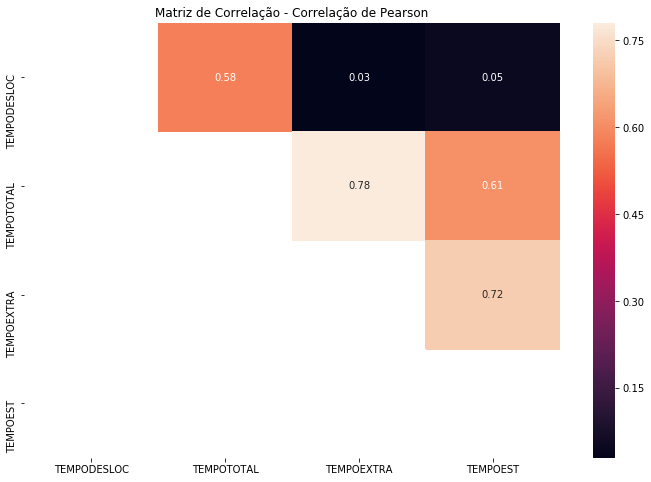

In [0]:
numericas =[
            #'Idade', varia muito pouco
            #'Mes_Nascimento',
            #'Ano_Nascimento',
            #'Pessoas_Moram_Casa',
            #'Banheiros_Chuveiro',
            #'qtd_dias_Feijao_ultima_semana',
             #'qtd_dias_Frituras_ultima_semana',
             #'qtd_dias_Legumes_Verduras_ultima_semana',
             #'qtd_dias_Guloseimas_ultima_semana',
           # 'qtd_dias_Frutas_Saladas_ultima_semana',
            #'qtd_dias_Refrigerante_ultima_semana',
            #'qtd_dias_Industrializados_ultima_semana',
            #'qtd_dias_Fast_Food_ultima_semana',
            #'qtd_dias_Com_Fome_ultimo_mes',
            #'qtd_dias_Frutas_ultimo_mes',
            #'qtd_dias_Frutas_ultimo_mes',
            #'qtd_dias_Legumes_Verduras_ultimo_mes',
            #'qtd_dias_Refrigerante_ultima_mes',
            #'qtd_dias_Indo_Caminhando_Escola_ultima_semana',
            #'qtd_dias_Voltando_Caminhando_Escola_ultima_semana',
            #'qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana',
            #'qtd_dias_Atividade_Fisica_NaAula_ultima_semana',
            #'qtd_dias_Atividade_Fisica_ForaAula_ultima_semana',
            #'horas_tv_meio_semana',
            #'tempo_sentado_fora_escola_na_semana',
            #'qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana',
            'TEMPODESLOC',
            'TEMPOTOTAL',
           #'TEMPOEDFIS',
           'TEMPOEXTRA',
           'TEMPOEST',
           #'idade_experimentou_bebida',
           #'qtd_vezes_dentista_ultimo_ano',
           # 'qtd_amigos_proximos'
]


correlação = round(abs(explicativas[numericas].corr()),2)
triangulo = correlação.where(np.triu(np.ones(correlação.shape), k=1).astype(np.bool))

#Criando uma representação gráfica para a matriz de correlação
plt.figure(figsize = (12,8))
sns.heatmap(triangulo, 
            xticklabels=correlação.columns.values,
            yticklabels=correlação.columns.values,annot=True)

plt.title('Matriz de Correlação - Correlação de Pearson')

plt.show()

In [0]:
#Ponto de corte
corte_alta_correlação = 0.7

#Selecionando colunas com correlações acima do corte
dropar = [colunas for colunas in triangulo.columns if any(triangulo[colunas] > corte_alta_correlação )]

print('Temos {} colunas para remover'.format(len(dropar)))

print('As colunas removidas serão', dropar)

explicativas = explicativas.drop(columns = dropar)


Temos 2 colunas para remover
As colunas removidas serão ['TEMPOEXTRA', 'TEMPOEST']

## 5) Selecionando features e criação da nova ABT (analytical base table)

In [0]:
explicativas = explicativas.drop(columns= ['qtd_dias_tabaco_ultimo_mesNenhumdianosultimos30dias0dia'
                   ,'qtd_dias_tabaco_ultimo_mes3a5diasnosultimos30dias'
                   ,'qtd_dias_tabaco_ultimo_mes1ou2diasnosultimos30dias'],axis=1)

In [0]:
melhores_features = list(explicativas.columns)

In [0]:
abt_treino.shape

Out[102]: (71450, 401)

In [0]:
abt_treino_fs = abt_treino[melhores_features]
abt_treino_fs['ja_fumou'] = abt_treino['ja_fumou'] 

abt_teste_fs = abt_teste[melhores_features]
abt_teste_fs['ja_fumou'] = abt_teste['ja_fumou']

/local_disk0/tmp/1601910063115-0/PythonShell.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import print_function
/local_disk0/tmp/1601910063115-0/PythonShell.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import linecache

In [0]:
abt_treino_fs = spark.createDataFrame(abt_treino_fs)
abt_teste_fs = spark.createDataFrame(abt_teste_fs)

abt_treino_fs.write.saveAsTable('abt_treino_fs',mode='overwrite')
abt_teste_fs.write.saveAsTable('abt_teste_fs',mode='overwrite')